# Exploratory Data Analysis using Python
Exploratory Data Analysis (EDA) is an approach in analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. EDA is very useful for:

1) Getting a better understanding of data<br>
2) Identifying various data patterns<br>
3) Getting a better understanding of the problem statement

We basically perform EDA with the help of Python's powerful libraries such as pandas, NumPy and Matplotlib. Python is a general purpose language and is often used for things other than data analysis and data science. <br><br> The <a href="https://pandas.pydata.org/">Pandas</a> module mainly works with the tabular data, whereas the <a href="https://numpy.org/">NumPy</a> module works with the numerical data. The Pandas provides some sets of powerful tools like DataFrame and Series that mainly used for analyzing the data, whereas in NumPy module offers a powerful object called Array. 
<br><br>
I'm using a Dataset which I found on <a href="https://www.kaggle.com/iamsouravbanerjee/analytics-industry-salaries-2022-india">Kaggle</a> in the following CSV format:

<code>Company Name,Job Title,Salaries Reported,Location,Salary
Mu Sigma,Data Scientist,105,Bangalore,"₹6,48,573/yr"
IBM,Data Scientist,95,Bangalore,"₹11,91,950/yr"
Tata Consultancy Services,Data Scientist,66,Bangalore,"₹8,36,874/yr"
Impact Analytics,Data Scientist,40,Bangalore,"₹6,69,578/yr"
Accenture,Data Scientist,32,Bangalore,"₹9,44,110/yr"
Infosys,Data Scientist,30,Bangalore,"₹9,08,764/yr"</code>

Before analysing this CSV file firstly we need to clean and transform this data to identify incorrect or irrelevant parts of the data and then replacing, or deleting the dirty data. For that lets import pandas module and read CSV. 

# Importing pandas, NumPy & Matplotlib module with the alias pd, nm & plt.

In [1]:
import pandas as pd
import numpy as nm
#matplotlib inline
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None  # It will not show any unnecessary warning. default='warn'

# Reading a CSV file using Pandas

In [2]:
# Reading CSV file in variable data_df
data_df = pd.read_csv("Dataset.csv")

Data from the CSV file is read and stored in a DataFrame object - one of the core data structures in Pandas for storing and working with tabular data. We typically use the _df suffix in the variable names for dataframes. 

In [3]:
# To find out the type of data_df
type(data_df)

pandas.core.frame.DataFrame

In [4]:
# Lets extract 10 random rows from the dataset using sample()
data_df.sample(10)

,Company_Name,Job_Title,Salaries_Reported,Location,Salary
46,Affle,Data Scientist,1.0,Bangalore,"₹9,33,286/yr"
1451,DigiTele Networks,Data Scientist,2.0,Hyderabad,"₹7,87,723/yr"
825,Zoom Video Communications,Data Scientist,2.0,Bangalore,"₹28,39,076/yr"
2715,GroupM,Data Analyst,2.0,New Delhi,"₹22,274/mo"
1148,PharmaACE,Data Scientist,1.0,Pune,"₹7,00,000/yr"
2645,Actiknow,Data Analyst,4.0,New Delhi,"₹3,63,669/yr"
2388,S&P Global,Data Analyst,4.0,Hyderabad,"₹6,58,529/yr"
3388,DataFactZ,Data Engineer,1.0,Hyderabad,"₹52,412/mo"
935,Digité,Data Scientist,1.0,Bangalore,"₹20,740/mo"
1197,Tribes.AI,Data Scientist,1.0,Pune,"₹4,20,000/yr"


The data is looking awesome but the salary column is not looking good since it include hourly, montly and yearly salary but we would need all yearly salary for analysis. Let clean & transform the data using pandas functions.

# Transforming Data using Pandas

In [5]:
# Creating temp column 'wise' to store 'yr', 'mo', 'hr' from salary
data_df['wise'] = data_df['Salary'].str.slice(-2)

# Lets remove the unwanted values and make salary column numeric using str()
data_df.Salary = data_df.Salary.str.slice(1,-3)
data_df.Salary = data_df.Salary.str.replace(',','')

# Converting salary column to float
data_df.Salary = data_df.Salary.astype(float)

data_df

,Company_Name,Job_Title,Salaries_Reported,Location,Salary,wise
0,MiQ,Data Scientist,1.0,Bangalore,1674802.0,yr
1,HCL Technologies,Machine Learning Engineer,2.0,Bangalore,99468.0,mo
2,Novotech,Data Engineer,2.0,Bangalore,97061.0,mo
3,SymphonyAI,Data Scientist,2.0,Bangalore,964.0,hr
4,Société Générale,Data Scientist,1.0,Bangalore,9568943.0,yr
...,...,...,...,...,...,...
4336,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,5180.0,mo
4337,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,751286.0,yr
4338,MyWays,Machine Learning Developer,1.0,Mumbai,410952.0,yr
4339,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,1612324.0,yr


In [6]:
# Convert montly salary to yearly salary where wise is equal to mo
data_df.Salary.loc[data_df.wise=='mo'] = data_df.Salary.loc[data_df.wise=='mo'] * 12

# Convert hourly salary to yearly salry where wise is equal to hr
data_df.Salary.loc[data_df.wise=='hr'] = data_df.Salary.loc[data_df.wise=='hr'] *8*5*4*12

# Created a new column 'Yearly_Salary' to store all Yearly Salary
data_df['Yearly_Salary'] = data_df.Salary

# Deleted previous Salary column as that is not required now.
data_df = data_df.drop(['Salary', 'wise'], axis=1)

# Now again extract 10 random rows from the dataset for rechecking
data_df.sample(10)

,Company_Name,Job_Title,Salaries_Reported,Location,Yearly_Salary
2816,The Sparks Foundation,Data Analyst,2.0,Mumbai,304980.0
3168,Mastercard,Data Engineer,2.0,Pune,924300.0
941,First Student,Data Scientist,1.0,Bangalore,246600.0
1346,Tata Consultancy Services,Junior Data Scientist,1.0,Pune,672000.0
4057,ValueLabs,Machine Learning Engineer,1.0,Hyderabad,1762835.0
2603,TO THE NEW,Data Analyst,5.0,New Delhi,309194.0
4309,Quantiphi,Senior Machine Learning Engineer,13.0,Mumbai,1130000.0
4029,FactSet,Machine Learning Engineer,7.0,Hyderabad,1746411.0
3010,Raju Tech,Machine Learning Engineer,1.0,Bangalore,1355169.0
2783,ICICI Bank,Data Analyst,4.0,Mumbai,477492.0


In [7]:
# To check the datatype of the columns
data_df.dtypes

Company_Name          object
Job_Title             object
Salaries_Reported    float64
Location              object
Yearly_Salary        float64
dtype: object

Now data is looking good as it now include Yearly Salary. Let's do some Data Analysis.

# Analyzing Data from Dataset

Let's try to answer some questions about our data.

1) What are the Highest Paying Jobs in all location?

In [8]:
data_df[['Job_Title','Yearly_Salary']].groupby(data_df.Location).max().sort_values(['Yearly_Salary'],ascending=False)

,Job_Title,Yearly_Salary
Location,,
Bangalore,Machine Learning Engineer,18807948.0
Pune,Software Engineer - Machine Learning,8557632.0
Mumbai,Software Engineer - Machine Learning,6044006.0
Hyderabad,Senior Machine Learning Engineer,5792640.0
New Delhi,Machine Learning Engineer,5092618.0


<AxesSubplot:title={'center':'Highest Paying Jobs by Location'}, xlabel='Location', ylabel='Salary in Crores (INR)'>

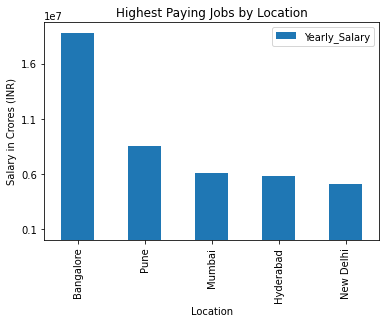

In [9]:
data_df[['Job_Title','Yearly_Salary']].groupby(data_df.Location).max().sort_values(['Yearly_Salary'],ascending=False).plot(kind='bar',yticks = range(1000000,20000000,5000000), xlabel='Location',ylabel='Salary in Crores (INR)', title='Highest Paying Jobs by Location')

2) What are the Lowest Paying Jobs in all location?

In [10]:
data_df[['Job_Title','Yearly_Salary']].groupby(data_df.Location).min().sort_values(['Yearly_Salary'],ascending=False)

,Job_Title,Yearly_Salary
Location,,
New Delhi,Data Analyst,37008.0
Mumbai,Data Analyst,27897.0
Pune,Data Analyst,24120.0
Bangalore,Data Analyst,21628.0
Hyderabad,Associate Machine Learning Engineer,10814.0


<AxesSubplot:title={'center':'Lowest Paying Jobs by Location'}, xlabel='Location', ylabel='Salary in Thousand (INR)'>

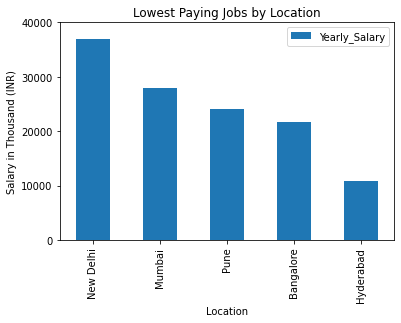

In [11]:
data_df[['Job_Title','Yearly_Salary']].groupby(data_df.Location).min().sort_values(['Yearly_Salary'],ascending=False).plot(kind='bar',yticks = range(0,50000,10000), xlabel='Location',ylabel='Salary in Thousand (INR)', title='Lowest Paying Jobs by Location')

3) Top 5 Highest Paying Companies?

In [12]:
data_df[['Yearly_Salary','Job_Title']].groupby(data_df.Company_Name).max().sort_values(['Yearly_Salary'],ascending=False).head()

,Yearly_Salary,Job_Title
Company_Name,,
L Brands,18807948.0,Data Scientist
Hashworks,16122060.0,Data Scientist
Société Générale,9568943.0,Data Scientist
Orbinet Technologies,8671344.0,Data Scientist
Ritwik IT Services,8666964.0,Data Scientist


<AxesSubplot:title={'center':'Highest Paying Companies'}, xlabel='Company', ylabel='Salary in Crores (INR)'>

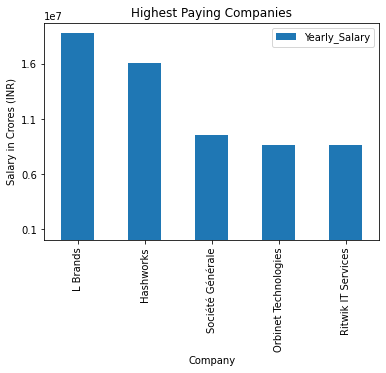

In [13]:
data_df[['Yearly_Salary','Job_Title']].groupby(data_df.Company_Name).max().sort_values(['Yearly_Salary'],ascending=False).head().plot(kind='bar',yticks = range(1000000,20000000,5000000), xlabel='Company',ylabel='Salary in Crores (INR)', title='Highest Paying Companies')

4) Top 5 Lowest Paying Companies?

In [14]:
data_df[['Yearly_Salary','Job_Title']].groupby(data_df.Company_Name).min().sort_values(['Yearly_Salary'],ascending=True).head()

,Yearly_Salary,Job_Title
Company_Name,,
Orbit Technologies,10814.0,Data Analyst
20K Group,21628.0,Data Analyst
Fran Biz,24120.0,Data Analyst
Wipro Technologies,24756.0,Data Analyst
Karza Technologies,27897.0,Data Scientist


<AxesSubplot:title={'center':'Lowest Paying Companies'}, xlabel='Company'>

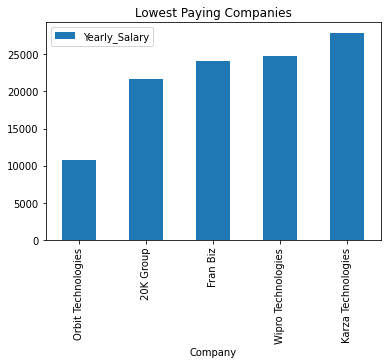

In [15]:
data_df[['Yearly_Salary','Job_Title']].groupby(data_df.Company_Name).min().sort_values(['Yearly_Salary'],ascending=True).head().plot(kind='bar', xlabel='Company',title='Lowest Paying Companies')


5) How many Jobs Title are there?

In [16]:
data_df.Job_Title.value_counts()


Data Scientist                              1844
Data Analyst                                 988
Data Engineer                                804
Machine Learning Engineer                    568
Data Science                                  43
Senior Data Scientist                         39
Junior Data Scientist                         18
Senior Machine Learning Engineer               9
Lead Data Scientist                            6
Machine Learning Scientist                     2
Machine Learning Data Associate II             2
Machine Learning Consultant                    2
Software Engineer - Machine Learning           2
Machine Learning Developer                     2
Data Science Lead                              1
Machine Learning Engineer/Data Scientist       1
Data Scientist - Trainee                       1
Machine Learning Data Associate                1
Machine Learning Data Associate I              1
Machine Learning Associate                     1
Data Science Manager

<AxesSubplot:title={'center':'Total Job Titles'}, xlabel='Job Titles'>

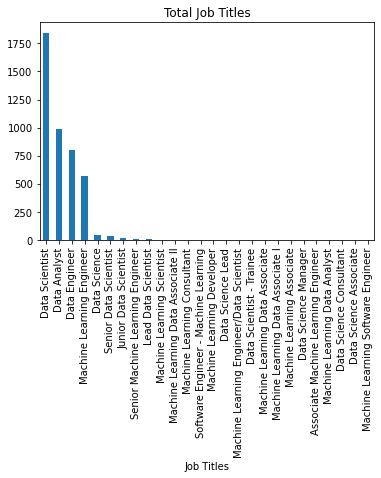

In [17]:
data_df.Job_Title.value_counts().plot(kind='bar', xlabel='Job Titles',title='Total Job Titles')


6) How many Job are there in all Location?

In [18]:
data_df[['Location','Job_Title']].groupby(['Location','Job_Title']).value_counts()

Location   Job_Title                               
Bangalore  Data Analyst                                200
           Data Engineer                               199
           Data Scientist                              985
           Machine Learning Engineer                   200
Hyderabad  Associate Machine Learning Engineer           1
           Data Analyst                                194
           Data Engineer                               162
           Data Scientist                              198
           Machine Learning Associate                    1
           Machine Learning Data Analyst                 1
           Machine Learning Data Associate               1
           Machine Learning Data Associate I             1
           Machine Learning Data Associate II            1
           Machine Learning Engineer                   106
           Senior Machine Learning Engineer              3
Mumbai     Data Analyst                                196
    